In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr
from datetime import date
from mutagen.mp3 import MP3
import os, random
import moviepy.editor as mp

csv = 'http://www.bccdc.ca/Health-Info-Site/Documents/BCCDC_COVID19_Dashboard_Case_Details.csv'
Regional_csv = 'http://www.bccdc.ca/Health-Info-Site/Documents/BCCDC_COVID19_Regional_Summary_Data.csv'
DAILY_COVID19 = pd.read_csv(csv)

today = date.today().strftime("%m%d%Y")

In [2]:
#INSERT CUSTOM FUNCTIONS

# GET MP3 PLAYING TIME IN SECONDS
def mp3length(p):
    audio = MP3(p)
    audio_info = audio.info    
    return int(audio_info.length)

# RANDOM SELECTION OF MP3 BGM
def randpath():
    select = random.choice(os.listdir("C:\\Users\\totoc\\Desktop\\EPIC_bgm\\"))
    randpath = 'C:\\Users\\totoc\\Desktop\\EPIC_bgm\\' + select #change dir name to whatever
    randlength = mp3length(randpath)
    return randpath, randlength, select

In [3]:
# df, filename, title, name_BGM
def racy(d, f, t, B):
    m, l, s = randpath()
    print(m)
    print(l)
    print(s)
    
    bcr.bar_chart_race(
        df=d,
        filename=f,
        figsize=(5, 3),
        title=t,
        filter_column_colors=False,
        dpi=144*4,
        period_summary_func=lambda v, r: {'x': .95, 'y': -.1,
                                      's': f'Total Cases: {v.sum():,.0f} \n Data from BCCDC, Visualization by TC \n Last Update on {date.today()} \n \n \n Music: {s}',
                                      'ha': 'right', 'size': 6, 'family': 'Courier New'}, 
        period_length=l*1001/len(d),
        fixed_max=False)
    video = mp.VideoFileClip(f)
    video.write_videofile(B+today+'.mp4', audio=m)

In [4]:
DAILY_COVID19

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2020-01-29,Out of Canada,M,40-49,Lab-diagnosed
1,2020-02-06,Vancouver Coastal,F,50-59,Lab-diagnosed
2,2020-02-10,Out of Canada,F,20-29,Lab-diagnosed
3,2020-02-10,Out of Canada,M,30-39,Lab-diagnosed
4,2020-02-18,Interior,F,30-39,Lab-diagnosed
...,...,...,...,...,...
145690,2021-06-07,Fraser,M,30-39,Lab-diagnosed
145691,2021-06-07,Fraser,F,40-49,Lab-diagnosed
145692,2021-06-07,Interior,F,70-79,Lab-diagnosed
145693,2021-06-07,Fraser,M,10-19,Lab-diagnosed


In [5]:
DAILY_COVID19['month_year'] = pd.to_datetime(DAILY_COVID19['Reported_Date']).dt.to_period('M')
DAILY_COVID19['Week'] = pd.to_datetime(DAILY_COVID19['Reported_Date']).dt.to_period('W')

In [6]:
DAILY_COVID19.describe()

,Reported_Date,HA,Sex,Age_Group,Classification_Reported,month_year,Week
count,145695,145695,145695,145695,145695,145695,145695
unique,466,6,3,11,2,18,72
top,2021-04-07,Fraser,M,20-29,Lab-diagnosed,2021-04,2021-04-05/2021-04-11
freq,1319,84868,74932,32727,144591,29492,7921


In [7]:
DAILY_COVID19.head()

,Reported_Date,HA,Sex,Age_Group,Classification_Reported,month_year,Week
0,2020-01-29,Out of Canada,M,40-49,Lab-diagnosed,2020-01,2020-01-27/2020-02-02
1,2020-02-06,Vancouver Coastal,F,50-59,Lab-diagnosed,2020-02,2020-02-03/2020-02-09
2,2020-02-10,Out of Canada,F,20-29,Lab-diagnosed,2020-02,2020-02-10/2020-02-16
3,2020-02-10,Out of Canada,M,30-39,Lab-diagnosed,2020-02,2020-02-10/2020-02-16
4,2020-02-18,Interior,F,30-39,Lab-diagnosed,2020-02,2020-02-17/2020-02-23


In [8]:
#grouped_DAILY_COVID19 = DAILY_COVID19.groupby(['month_year', 'Age_Group']).agg({'HA': ['count']})
#grouped_DAILY_COVID19

#pivot_DAILY_COVID19 = pd.pivot_table(DAILY_COVID19, values = 'HA', index = 'Week', columns=['Age_Group'], aggfunc='count', fill_value=0)
#pivot_DAILY_COVID19

In [9]:
x = DAILY_COVID19['Age_Group'].unique()
x = np.sort(x)
order = [9,0,1,2,3,4,5,6,7,8,10]
x = [np.sort(x)[i] for i in order]
x

['<10',
 '10-19',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90+',
 'Unknown']

In [10]:
#pivot_DAILY_COVID19 = pivot_DAILY_COVID19[[x]]
#pivot_DAILY_COVID19 = pivot_DAILY_COVID19.reindex(columns=x)
#pivot_DAILY_COVID19

In [11]:
#df['Fruit Total']= df.iloc[:, -4:-1].sum(axis=1)
# BC_DAILY_COVID19 = pd.DataFrame()
# BC_DAILY_COVID19['<20'] = pivot_DAILY_COVID19.iloc[:,:2].sum(axis=1)
# BC_DAILY_COVID19['20-39'] = pivot_DAILY_COVID19.iloc[:,2:4].sum(axis=1)
# BC_DAILY_COVID19['40-59'] = pivot_DAILY_COVID19.iloc[:,4:6].sum(axis=1)
# BC_DAILY_COVID19['60-79'] = pivot_DAILY_COVID19.iloc[:,6:8].sum(axis=1)
# BC_DAILY_COVID19['>80'] = pivot_DAILY_COVID19.iloc[:,8:10].sum(axis=1)
# BC_DAILY_COVID19

In [12]:
# ax = BC_DAILY_COVID19.cumsum().plot.area(figsize=(12,12))
# ax.set_title('Total COVID-19 Cases in BC Since Jan 27, 2020')

In [13]:
#BC_DAILY_COVID19.cumsum()

#ax = BC_DAILY_COVID19.cumsum().plot.pie(y = 'Week',figsize=(12,12))
#ax.set_title('Total COVID-19 Cases in BC Since Jan 27, 2020')

In [14]:
#ax = BC_DAILY_COVID19.plot.area(figsize=(12,8))
#ax.set_title('COVID-19 Cases in BC Since Jan 27, 2020')

In [15]:
# BC_DAILY_COVID19_group2 = BC_DAILY_COVID19.div(BC_DAILY_COVID19.sum(axis=1), axis=0).multiply(100)
# BC_DAILY_COVID19_group2

In [16]:
# ax = BC_DAILY_COVID19_group2.plot.bar(stacked=True, figsize=(12,12))
# ax.set_title('Porportion of COVID-19 Cases in BC by Age Group Since Jan 27, 2020')

In [17]:
# M = DAILY_COVID19['month_year'].unique()
# M

In [18]:
# DAILY_COVID19.loc[DAILY_COVID19['month_year'] == M[15]].groupby(['Age_Group']).agg({'HA': ['count']})

In [19]:
# df, filename, title, name_BGM
df = pd.pivot_table(
        DAILY_COVID19, 
        values = 'HA', 
        index = 'Reported_Date', 
        columns=['Age_Group'], 
        aggfunc='count', 
        fill_value=0).cumsum().reindex(columns=x)

racy(df, 'temp_age.mp4', 'Cumulated COVID-19 Cases in BC \n since January 27, 2020 by Age Groups','BC_covid19_Age_BGM_')



# m1, l1, s1 = randpath()
# print(m1)
# print(l1)
# print(s1)


# bcr.bar_chart_race(
#     df=df,
#     filename='BC_covid19_horiz.mp4',
#     figsize=(5, 3),
#     title='Cumulated COVID-19 Cases in BC \n since January 27, 2020 by Age Groups',
#     filter_column_colors=False,
#     dpi=144*4,
#     period_summary_func=lambda v, r: {'x': .95, 'y': .02,
#                                       's': f'Total Cases: {v.nlargest(200).sum():,.0f} \n Data from BCCDC, Visualization by TC \n Last Update on {date.today()}',
#                                       'ha': 'right', 'size': 5.5, 'family': 'Courier New'}, 
#     period_length=l1*1001/len(df),
#     fixed_max=False)





C:\Users\totoc\Desktop\EPIC_bgm\savfk-wisdom.mp3
196
savfk-wisdom.mp3


t:   0%|                                                                    | 3/4651 [00:00<03:02, 25.42it/s, now=None]

Moviepy - Building video BC_covid19_Age_BGM_06082021.mp4.
Moviepy - Writing video BC_covid19_Age_BGM_06082021.mp4



Moviepy - Done !
Moviepy - video ready BC_covid19_Age_BGM_06082021.mp4


In [20]:


#audio = mp.AudioFileClip(m)
#video1 = mp.VideoFileClip()
#final = video1.set_audio(audio)
#final.write_videofile("BC_covid19_horiz.mp4",codec= 'mpeg4' ,audio_codec='libvorbis')


# video = mp.VideoFileClip('BC_covid19_horiz.mp4')
# video.write_videofile('BC_covid19_Age_BGM_'+today+'.mp4', audio=m1)

<AxesSubplot:>

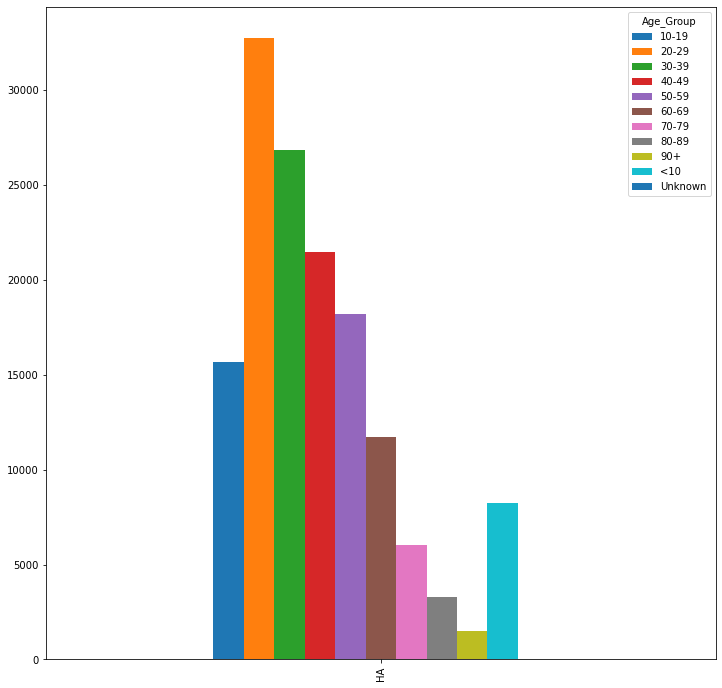

In [21]:
pd.pivot_table(DAILY_COVID19, values = 'HA', columns=['Age_Group'], aggfunc='count', fill_value=0).plot.bar(stacked=False, figsize=(12,12))


In [22]:
DAILY_COVID19_Regional = pd.read_csv(Regional_csv)

In [23]:
DAILY_COVID19_Regional

,Date,Province,HA,HSDA,Cases_Reported,Cases_Reported_Smoothed
0,2020-01-29,BC,All,All,0,0.00
1,2020-01-29,BC,Fraser,All,0,0.00
2,2020-01-29,BC,Fraser,Fraser East,0,0.00
3,2020-01-29,BC,Fraser,Fraser North,0,0.00
4,2020-01-29,BC,Fraser,Fraser South,0,0.00
...,...,...,...,...,...,...
12891,2021-06-07,BC,Vancouver Island,All,11,3.86
12892,2021-06-07,BC,Vancouver Island,Central Vancouver Island,1,0.71
12893,2021-06-07,BC,Vancouver Island,North Vancouver Island,2,0.71
12894,2021-06-07,BC,Vancouver Island,South Vancouver Island,8,2.43


In [24]:
#remove "All" from the dataframe
DAILY_COVID19_Regional = DAILY_COVID19_Regional[(DAILY_COVID19_Regional['HA'] != 'All') & (DAILY_COVID19_Regional['HSDA'] != 'All')]
DAILY_COVID19_Regional

,Date,Province,HA,HSDA,Cases_Reported,Cases_Reported_Smoothed
2,2020-01-29,BC,Fraser,Fraser East,0,0.00
3,2020-01-29,BC,Fraser,Fraser North,0,0.00
4,2020-01-29,BC,Fraser,Fraser South,0,0.00
5,2020-01-29,BC,Fraser,Unknown,0,0.00
7,2020-01-29,BC,Interior,East Kootenay,0,0.00
...,...,...,...,...,...,...
12890,2021-06-07,BC,Vancouver Coastal,Vancouver,19,24.29
12892,2021-06-07,BC,Vancouver Island,Central Vancouver Island,1,0.71
12893,2021-06-07,BC,Vancouver Island,North Vancouver Island,2,0.71
12894,2021-06-07,BC,Vancouver Island,South Vancouver Island,8,2.43


In [25]:
pivot_DAILY_COVID19_Regional = pd.pivot_table(DAILY_COVID19_Regional, values = 'Cases_Reported', index = 'Date', columns=['HA'], aggfunc='sum', fill_value=0)
pivot_DAILY_COVID19_Regional

HA,Fraser,Interior,Northern,Out of Canada,Vancouver Coastal,Vancouver Island
Date,,,,,,
2020-01-29,0,0,0,1,0,0
2020-01-30,0,0,0,0,0,0
2020-01-31,0,0,0,0,0,0
2020-02-01,0,0,0,0,0,0
2020-02-02,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-06-03,100,30,7,1,41,3
2021-06-04,126,57,7,0,35,1
2021-06-05,84,31,1,0,18,5


In [26]:
# df, filename, title, name_BGM
df2 = pivot_DAILY_COVID19_Regional.cumsum()

racy(df2, 'temp_regional.mp4', 'Cumulated COVID-19 Cases in BC \n since January 27, 2020 by Health Regions','BC_covid19_Region_BGM_')

# m2, l2 = randpath()
# print(m2)
# print(l2)

# df2 = pivot_DAILY_COVID19_Regional.cumsum()

# bcr.bar_chart_race(
#     df=df2,
#     filename='BC_covid19_horiz_region.mp4',
#     figsize=(5, 3),
#     title='Cumulated COVID-19 Cases in BC \n since January 27, 2020 by Health Regions',
#     filter_column_colors=True,
#     dpi=144*4,
#     period_summary_func=lambda v, r: {'x': .95, 'y': .02,
#                                       's': f'Total Cases:  {v.nlargest(200).sum():,.0f} \n Data from BCCDC, Visualization by TC \n Last Update on {date.today()}',
#                                       'ha': 'right', 'size': 5.5, 'family': 'Courier New'}, 
#     period_length=l2*1001/len(df2))  

C:\Users\totoc\Desktop\EPIC_bgm\alexander-nakarada-carol-of-the-bells-rock-version.mp3
149
alexander-nakarada-carol-of-the-bells-rock-version.mp3


t:   0%|                                                                    | 4/4952 [00:00<02:14, 36.70it/s, now=None]

Moviepy - Building video BC_covid19_Region_BGM_06082021.mp4.
Moviepy - Writing video BC_covid19_Region_BGM_06082021.mp4



Moviepy - Done !
Moviepy - video ready BC_covid19_Region_BGM_06082021.mp4


In [27]:
# video = mp.VideoFileClip('BC_covid19_horiz_region.mp4')
# video.write_videofile('BC_covid19_Region_BGM_'+today+'.mp4', audio=m2)

In [28]:
pivot_DAILY_COVID19_HSDA = pd.pivot_table(DAILY_COVID19_Regional, values = 'Cases_Reported', index = 'Date', columns=['HSDA'], aggfunc='sum', fill_value=0)
pivot_DAILY_COVID19_HSDA

HSDA,Central Vancouver Island,East Kootenay,Fraser East,Fraser North,Fraser South,Kootenay Boundary,North Shore/Coast Garibaldi,North Vancouver Island,Northeast,Northern Interior,Northwest,Okanagan,Out of Canada,Richmond,South Vancouver Island,Thompson Cariboo Shuswap,Unknown,Vancouver
Date,,,,,,,,,,,,,,,,,,
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03,1,1,26,28,45,3,3,1,4,3,0,24,1,6,1,2,1,32
2021-06-04,0,6,18,51,57,5,6,0,3,3,1,44,0,3,1,2,0,26
2021-06-05,2,3,13,23,48,1,4,0,0,1,0,26,0,4,3,1,0,10


In [29]:
# df, filename, title, name_BGM
df3 = pivot_DAILY_COVID19_HSDA.cumsum()
racy(df3, 'temp_HDSA.mp4','Cumulated COVID-19 Cases in BC \n since January 27, 2020 by HSDA','BC_covid19_HSDA_BGM_')

# m3, l3 = randpath()
# print(m3)
# print(l3)

# df3 = pivot_DAILY_COVID19_HSDA.cumsum()

# bcr.bar_chart_race(
#     df=df3,
#     filename='BC_covid19_horiz_HSDA.mp4',
#     figsize=(5, 3),
#     title='Cumulated COVID-19 Cases in BC \n since January 27, 2020 by HSDA',
#     filter_column_colors=True,
#     dpi=144*4,
#     period_summary_func=lambda v, r: {'x': .95, 'y': .02,
#                                       's': f'Total Cases:  {v.nlargest(200).sum():,.0f} \n Data from BCCDC, Visualization by TC \n Last Update on {date.today()}',
#                                       'ha': 'right', 'size': 5.5, 'family': 'Courier New'},
#     period_length=l3*1001/len(df3)
#     )  



C:\Users\totoc\Desktop\EPIC_bgm\alexander-nakarada-the-cold-battle.mp3
124
alexander-nakarada-the-cold-battle.mp3


t:   0%|                                                                    | 4/4952 [00:00<02:39, 31.00it/s, now=None]

Moviepy - Building video BC_covid19_HSDA_BGM_06082021.mp4.
Moviepy - Writing video BC_covid19_HSDA_BGM_06082021.mp4



Moviepy - Done !
Moviepy - video ready BC_covid19_HSDA_BGM_06082021.mp4


In [30]:
# video = mp.VideoFileClip('BC_covid19_horiz_HSDA.mp4')
# video.write_videofile('BC_covid19_HSDA_BGM_'+today+'.mp4', audio=m3)

In [31]:
#### STOP ####

In [32]:
### DAILY STATISTICS ###

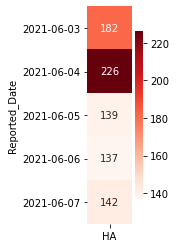

In [33]:
#DAILY_COVID19

import seaborn as sns
import matplotlib.pyplot as plt

Last5 = pd.pivot_table(DAILY_COVID19, values = 'HA', index = 'Reported_Date', aggfunc='count', fill_value=0).tail(5)
fig, ax = plt.subplots(figsize=(1,4))     
ax = sns.heatmap(Last5, annot=True, fmt='g', cmap='Reds')
ax.figure.savefig("Last 5 Days.png")

In [34]:
# Last Update #

temp = pd.pivot_table(DAILY_COVID19, values = 'HA', index = 'Reported_Date', columns=['Age_Group'], aggfunc='count', fill_value=0).reindex(columns=x).tail(10)

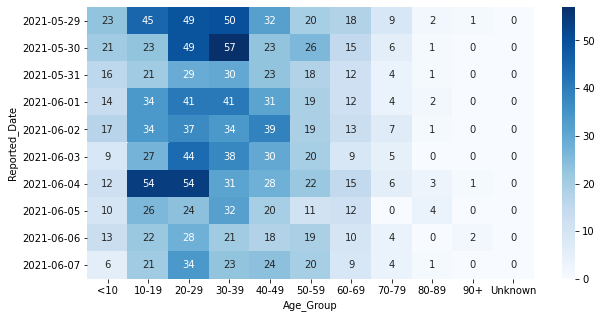

In [35]:


fig, ax = plt.subplots(figsize=(10,5))     
ax = sns.heatmap(temp, annot=True, cmap='Blues', fmt='g')
ax.figure.savefig("Heatmap.png")

In [36]:
tempaudio = MP3('C:\\Users\\totoc\\Desktop\\EPIC_bgm\\maxkomusic-patriotic-heroism.mp3')
print(tempaudio.info.length)
print(tempaudio.info.bitrate)

167.00054421768706
320000


In [37]:
# from mutagen.mp3 import MP3    
# def mp3_reader(path):
#    track = MP3(path)       
#    try:
#        print(track['artist'])
#    except SystemError:
#        print ("SYSTEM ERROR!")
MP3('C:\\Users\\totoc\\Desktop\\EPIC_bgm\\maxkomusic-patriotic-heroism.mp3')['TPE1']

TPE1(encoding=<Encoding.UTF16: 1>, text=['MaxKoMusic'])